In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Hourly Acitivity Data

In [78]:
Hourly_Calories_df=pd.read_csv("/content/drive/MyDrive/Week 8/hourlyCalories_merged.csv")
Hourly_Intensities_df=pd.read_csv("/content/drive/MyDrive/Week 8/hourlyIntensities_merged.csv")
Hourly_Steps_df=pd.read_csv("/content/drive/MyDrive/Week 8/hourlySteps_merged.csv")


# Merge the datasets using common columns
merged_df = pd.merge(Hourly_Calories_df, Hourly_Intensities_df, on=["Id", "ActivityHour"])
Hourly_Activity_merged_df = pd.merge(merged_df, Hourly_Steps_df, on=["Id", "ActivityHour"])

# Display the merged dataset
Hourly_Activity_merged_df.head()


,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333,373
1,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
2,1503960366,4/12/2016 2:00:00 AM,59,7,0.116667,151
3,1503960366,4/12/2016 3:00:00 AM,47,0,0.000000,0
4,1503960366,4/12/2016 4:00:00 AM,48,0,0.000000,0


In [79]:
Hourly_Activity_merged_df['ActivityHour'] = pd.to_datetime(Hourly_Activity_merged_df['ActivityHour'])


In [80]:
Hourly_Activity_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   Calories          22099 non-null  int64         
 3   TotalIntensity    22099 non-null  int64         
 4   AverageIntensity  22099 non-null  float64       
 5   StepTotal         22099 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.2 MB


In [81]:
Hourly_Activity_merged_df.isnull().sum()

Id                  0
ActivityHour        0
Calories            0
TotalIntensity      0
AverageIntensity    0
StepTotal           0
dtype: int64

In [82]:
Hourly_Activity_merged_df.duplicated().sum()

0

In [83]:
Hourly_Activity_merged_df.drop_duplicates(inplace=True)
Hourly_Activity_merged_df.duplicated().sum()

0

In [84]:
Hourly_Activity_merged_df.shape

(22099, 6)

In [85]:
Hourly_Activity_merged_df.describe()

,Id,Calories,TotalIntensity,AverageIntensity,StepTotal
count,2.209900e+04,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,97.386760,12.035341,0.200589,320.166342
std,2.422500e+09,60.702622,21.133110,0.352219,690.384228
min,1.503960e+09,42.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,63.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,83.000000,3.000000,0.050000,40.000000
75%,6.962181e+09,108.000000,16.000000,0.266667,357.000000
max,8.877689e+09,948.000000,180.000000,3.000000,10554.000000


In [86]:
# Convert to ActivityHour and format
Hourly_Activity_merged_df['ActivityHour'] = pd.to_datetime(Hourly_Activity_merged_df['ActivityHour']).dt.strftime('%m/%d/%Y %I:%M %p')
Hourly_Activity_merged_df['ActivityHour'] = Hourly_Activity_merged_df['ActivityHour'].str.replace('-', '/')


In [87]:
print(Hourly_Activity_merged_df.to_string())

Output hidden; open in https://colab.research.google.com to view.

In [89]:
# Save the merged dataframe to a new CSV file
Hourly_Activity_merged_df.to_csv("/content/Hourly_dataset.csv")
#saved as /content/Hourly_merged_dataset.csv

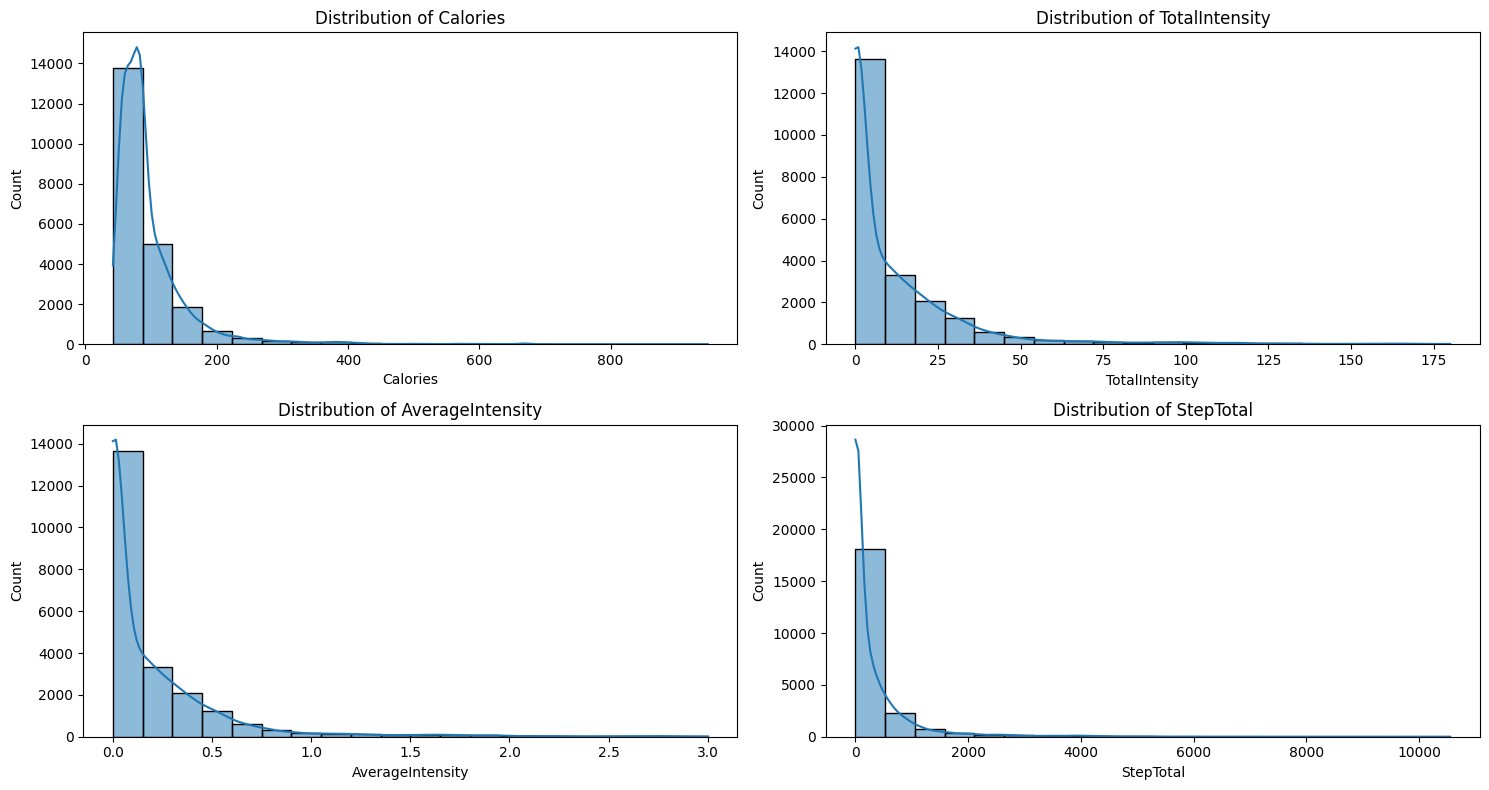

In [92]:
# Create histograms for Calories, TotalIntensity, AverageIntensity, and StepTotal
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.histplot(Hourly_Activity_merged_df['Calories'], bins=20, kde=True)
plt.title('Distribution of Calories')

plt.subplot(2, 2, 2)
sns.histplot(Hourly_Activity_merged_df['TotalIntensity'], bins=20, kde=True)
plt.title('Distribution of TotalIntensity')

plt.subplot(2, 2, 3)
sns.histplot(Hourly_Activity_merged_df['AverageIntensity'], bins=20, kde=True)
plt.title('Distribution of AverageIntensity')

plt.subplot(2, 2, 4)
sns.histplot(Hourly_Activity_merged_df['StepTotal'], bins=20, kde=True)
plt.title('Distribution of StepTotal')

plt.tight_layout()
plt.show()


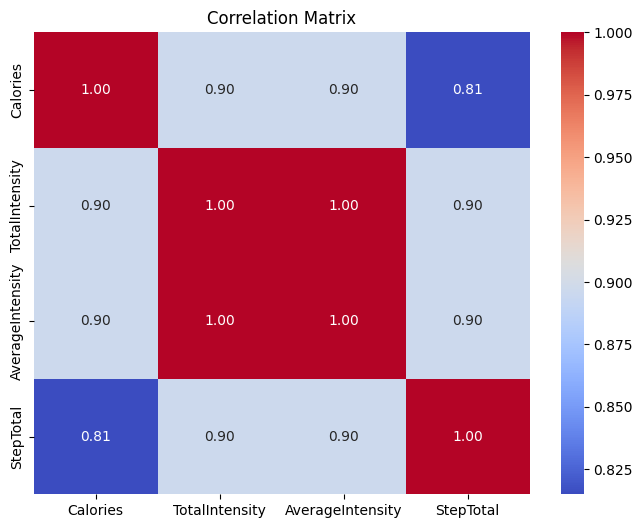

In [95]:
# Create a heatmap to visualize the correlation matrix
correlation_matrix = Hourly_Activity_merged_df[['Calories', 'TotalIntensity', 'AverageIntensity', 'StepTotal']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
